# Serie A - Pressing


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.colors as mcolors
from highlight_text import fig_text
import pandas as pd
import numpy as np

from PIL import Image
import urllib
import os

In [3]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [4]:
import ScraperFC as sfc
import traceback

# Initialize the Understat scraper
scraper = sfc.Understat()
try:
    # Scrape the table
    table = scraper.scrape_league_table(year=2023, league="Serie A")
    #formations = scraper.scrape_formations(year=2023, league="Serie A")

except:
    # Catch and print any exceptions. This allows us to still close the
    # scraper below, even if an exception occurs.
    traceback.print_exc()
finally:
    # It"s important to close the scraper when you"re done with it. Otherwise,
    # you"ll have a bunch of webdrivers open and running in the background.
    scraper.close()

table

[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [00:00<00:00, 14.7MB/s]


,№,Team,M,W,D,L,G,GA,PTS,xG,NPxG,xGA,NPxGA,NPxGD,PPDA,OPPDA,DC,ODC,xPTS
0,1,Napoli,34,26,5,3,70,23,83,64.83,57.98,27.27,25.75,32.24,9.46,16.64,306,157,71.36
1,2,Juventus,34,20,6,8,52,28,66,53.68,48.99,35.76,32.72,16.27,13.37,11.89,185,185,58.1
2,3,Lazio,34,19,7,8,52,26,64,46.85,41.38,40.35,39.59,1.79,14.95,13.57,240,183,49.98
3,4,Inter,34,20,3,11,62,35,63,66.38,62.57,29.85,27.57,35.00,9.79,17.93,310,160,71.38
4,5,AC Milan,34,17,10,7,55,39,61,61.28,59.00,36.69,32.88,26.12,9.28,13.07,245,186,62.25
5,6,Atalanta,34,17,7,10,56,41,58,53.74,47.48,39.16,36.88,10.60,11.14,12.40,291,172,55.69
6,7,Roma,34,17,7,10,45,33,58,57.83,50.90,27.42,25.14,25.76,12.47,10.66,208,127,65.05
7,8,Fiorentina,34,12,10,12,45,40,46,48.8,44.23,45.58,40.25,3.98,8.47,11.49,261,157,47.81
8,9,Udinese,34,11,13,10,45,41,46,43.55,42.03,44.41,39.76,2.26,12.78,10.01,242,202,46.82
9,10,Bologna,34,12,10,12,43,44,46,39.37,34.81,49.96,43.11,-8.30,9.96,13.72,153,211,40.61


In [42]:
df = pd.read_csv('data/set_pieces.csv', index_col=0)
df = df.sort_values(by='SP', ascending=False).reset_index(drop=True)

df

,team_id,Team,SP,OP
0,9875,Napoli,17,41
1,9885,Juventus,17,26
2,8686,Roma,11,25
3,8636,Inter,10,39
4,8535,Fiorentina,10,26
5,8600,Udinese,9,28
6,8524,Atalanta,9,38
7,9876,Hellas Verona,7,16
8,9888,Lecce,6,15
9,8534,Empoli,6,19


In [15]:
'''
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]

'''

'''
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]
'''
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]

gradient.reverse()

'''
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]
'''
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_9264\354109607.py:78: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [16]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['SP'].min(),vmax=data['SP'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['SP'],
        color=cmap(norm(data['SP'])),
        #ec = "#000000", 
        #fc = "#74959A", 
        #alpha = 1,
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['SP']):
    
        format_str = f"{value}"
        text_ = ax.annotate(
            xy = (index, value-0.05),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 20, 2)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,18),
        xytext=(6, 18),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,18),
        xytext=(13, 18),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,18),
        xytext=(6, 18),
        text='+ forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,18),
        xytext=(13, 18),
        text='- forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

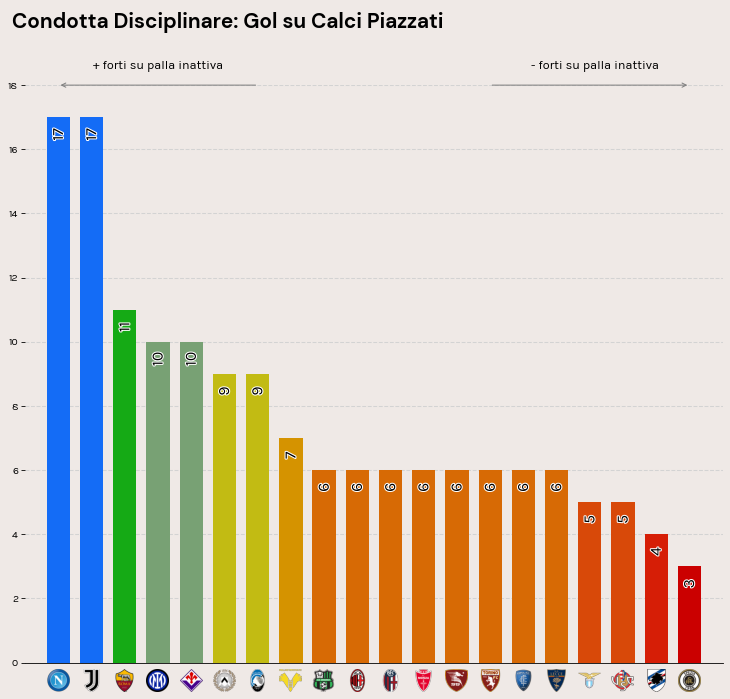

In [18]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Gol su Calci Piazzati",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_SetPieces.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_SetPieces_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [61]:
import pathlib
import plotly.express as px
import pandas as pd


def create_treemap_plotly(data):
    fig = px.treemap(
        data,
        path=['Team'],
        values = 'SP'
    )

    fig.data[0]['labels'] = create_label(data)

    fig.update_layout(
        treemapcolorway = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061',], #defines the colors in the treemap
        margin = dict(t=50, l=25, r=25, b=25),
        width = 1920,
        height = 1080,    
    )
    return fig

def create_label(data):
    return [str(row[1]) + "<br>" + str(row[2]) for _, row in data.iterrows()]
    

df = pd.read_csv('data/set_pieces.csv', index_col=0)
df = df.sort_values(by='SP', ascending=False)
create_treemap_plotly(df).show()
    

In [30]:
df.sort_values(by='SP', ascending=False)
df['SP']

0     17
1      5
2     17
3     10
4      9
5      6
6     11
7     10
8      6
9      6
10     6
11     6
12     9
13     6
14     6
15     6
16     7
17     3
18     5
19     4
Name: SP, dtype: int64

In [4]:
df = pd.read_csv('data/set_pieces.csv', index_col=0)
df = df.sort_values(by='SP', ascending=False).reset_index(drop=True)
df

,team_id,Team,SP,OP
0,9875,Napoli,17,41
1,9885,Juventus,17,26
2,8686,Roma,11,25
3,8636,Inter,10,39
4,8535,Fiorentina,10,26
5,8600,Udinese,9,28
6,8524,Atalanta,9,38
7,9876,Hellas Verona,7,16
8,9888,Lecce,6,15
9,8534,Empoli,6,19


In [67]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    #norm = mcolors.Normalize(vmin=data['TotCartellini'].min(),vmax=data['TotCartellini'].max())
    #cmap = plt.get_cmap('SOC')

    # We specify the width of the bar
    width_bar = 0.35

    # Fouls conceded
    ax.bar(
        data.index, 
        data['SP'], 
        ec = "black", 
        lw = .75, 
        color = "#005a9b", 
        zorder = 3, 
        width = width_bar,
        label = "Calci Piazzati"
    )

    ax.bar(
        data.index + width_bar, 
        data['OP'], 
        ec = "black", 
        lw = .75, 
        color = "#f4a261", 
        zorder = 3, 
        width = width_bar,
        label = "Open Play"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),#(0.45, 1.2),
        frameon = False,
        fontsize = 15
    )
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 51, 10)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index + width_bar/2,
        labels = []
    )
    '''
    
    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-width_bar/2, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)


    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,110),
        xytext=(6, 110),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,110),
        xytext=(13, 110),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,93),
        xytext=(6, 93),
        text='+ fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,93),
        xytext=(13, 93),
        text='- fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

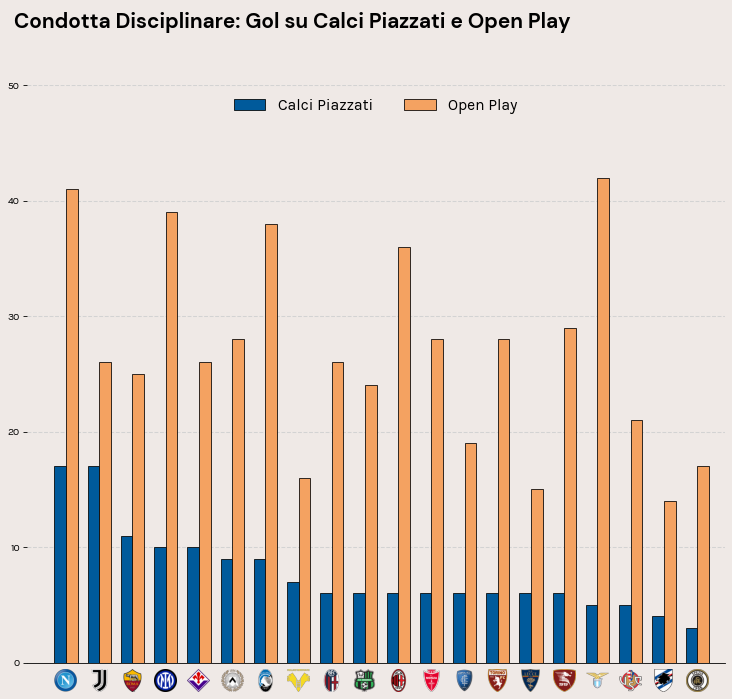

In [68]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Gol su Calci Piazzati e Open Play",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_SP_OP_1.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_SP_OP_1_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [37]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    #norm = mcolors.Normalize(vmin=data['TotCartellini'].min(),vmax=data['TotCartellini'].max())
    #cmap = plt.get_cmap('SOC')

    # We specify the width of the bar
    width_bar = 0.35

    # Home fouls committed
    ax.bar(
        data.index, 
        data['SP'], 
        ec = "black", 
        lw = .75, 
        color = "#005a9b", 
        zorder = 3, 
        width = 0.75,
        label = "Calci Piazzati"
    )

    # Away fouls committed (notice the bottom param)
    ax.bar(
        data.index, 
        data['OP'], 
        bottom = data['SP'], # This creates the stacked chart 
        ec = "black", 
        lw = .75, 
        color = "#f4a261", 
        zorder = 3, 
        width = 0.75,
        label = "Open Play"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),#(0.45, 1.2),
        frameon = False,
        fontsize = 15
    )

    # Annotate the bar charts

    aux_counter = 0
    for y_h, y_a in zip(data['SP'], data['OP']):
        # annotate percentage of fouls in the center of the bar
        home_text = ax.annotate(
            xy = (aux_counter, y_h/2),
            text = f"{y_h/(y_h + y_a):.0%}", # F-strings are cool :)
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 90
        )

        away_text = ax.annotate(
            xy = (aux_counter, y_h + y_a/2), # Notice the sum of the bottom data.
            text = f"{y_a/(y_h + y_a):.0%}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 90
        )

        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.75, foreground="black"), path_effects.Normal()]
        )

        aux_counter += 1

    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 61, 10)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)


    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,110),
        xytext=(6, 110),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,110),
        xytext=(13, 110),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,93),
        xytext=(6, 93),
        text='+ fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,93),
        xytext=(13, 93),
        text='- fallosi',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

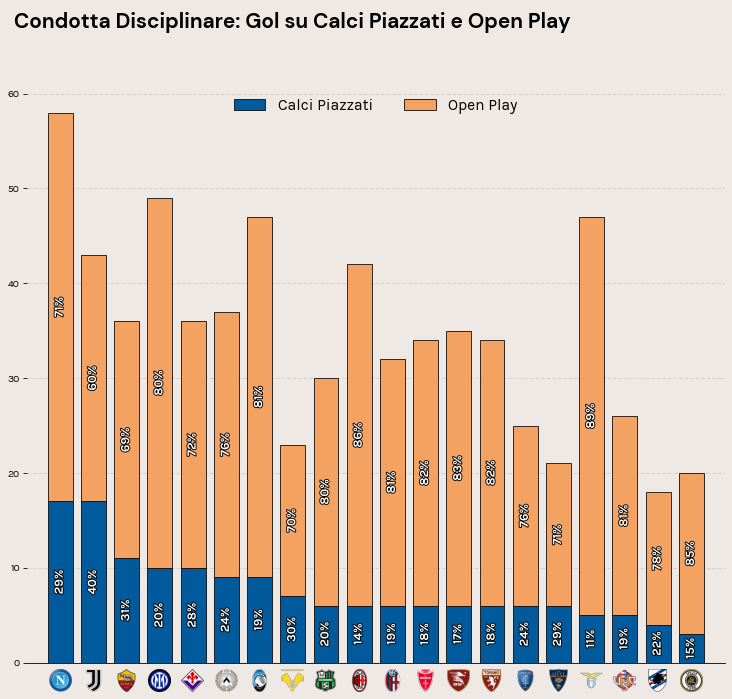

In [38]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Gol su Calci Piazzati e Open Play",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_SP_OP_2.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_SP_OP_2_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)


In [51]:
df["ratio"] = df["SP"]/35
df['ratio'] = np.round(df['ratio'], decimals=2)
df = df.sort_values(by = "ratio", ascending = False)

# We define our series to be plotted
ratio = df["ratio"].reset_index(drop = True)
df

,team_id,Team,SP,OP,ratio
0,9875,Napoli,17,41,0.49
1,9885,Juventus,17,26,0.49
2,8686,Roma,11,25,0.31
3,8636,Inter,10,39,0.29
4,8535,Fiorentina,10,26,0.29
5,8600,Udinese,9,28,0.26
6,8524,Atalanta,9,38,0.26
7,9876,Hellas Verona,7,16,0.20
10,6480,Salernitana,6,29,0.17
8,9888,Lecce,6,15,0.17


In [46]:
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]

gradient.reverse()

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [64]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "ratio", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    #fouls_per_card = data['Falli'] / data['Gialli']
    #fouls_per_card.sort_values(ascending=True)

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['ratio'].min(),vmax=data['ratio'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['ratio'],
        color=cmap(norm(data['ratio'])),
        #ec = "#000000", 
        #fc = "#74959A", 
        #alpha = 1,
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['ratio']):
    
        format_str = f"{value}"
        text_ = ax.annotate(
            xy = (index, value-0.01),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(np.arange(0, 0.7, 0.1))

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,0.5),
        xytext=(6, 0.5),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,0.5),
        xytext=(13, 0.5),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,0.51),
        xytext=(6, 0.51),
        text='+ forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,0.51),
        xytext=(13, 0.51),
        text='- forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

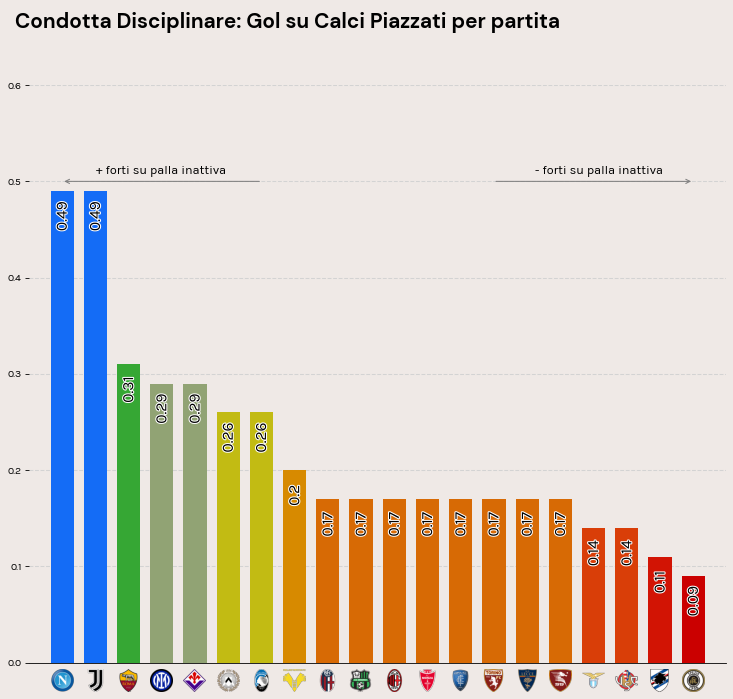

In [65]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Condotta Disciplinare: Gol su Calci Piazzati per partita",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_SetPieces_p90.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_SetPieces_p90_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)
